# Sentiment Analysis and Aspect-Based Sentiment Analysis

### **1. Import Libraries and Load Data**

**Explanation**:
- This step extracts reviews specific to the target business from the Yelp dataset.
- The data is saved in a structured format (CSV) for further processing.
- The `display(df_reviews.head())` command provides a quick preview of the extracted data.


In [1]:
# Import necessary libraries
import json
import pandas as pd

# Define file path (update this based on your dataset location)
review_file_path = "/Users/piyush/workspace/projects/BigData/final_project/yelp_dataset/yelp_academic_dataset_review.json"

# Define the target business ID (replace with the actual business ID)
target_business_id = "Ak_vHsHsYRP928VHVRL_tQ"

# Initialize a list to store extracted reviews
filtered_reviews = []

# Read JSON line by line (as Yelp dataset is structured this way)
with open(review_file_path, "r", encoding="utf-8") as file:
    for line in file:
        review = json.loads(line)  # Convert each line to a JSON object
        if review["business_id"] == target_business_id:
            filtered_reviews.append(review)  # Filter reviews for the target business

# Convert filtered reviews to a DataFrame
df_reviews = pd.DataFrame(filtered_reviews)

# Save the extracted reviews to a CSV file for future use
df_reviews.to_csv("extracted_reviews.csv", index=False)

# Display sample output
display(df_reviews.head())

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,nBGvD9lFMyZ_UkjGRQOTAg,5n4xLVuqOq2GVOtfxecEmQ,Ak_vHsHsYRP928VHVRL_tQ,4.0,0,0,0,"SO good! Not very healthy, but I can't resist ...",2015-02-03 04:37:13
1,1-mQK2AEGQw3Y_zNn2ejvw,a_iFcnIHwsb9ww81kRYirA,Ak_vHsHsYRP928VHVRL_tQ,2.0,2,0,0,"Love Panda, this location has serious manageme...",2014-07-28 06:07:55
2,pGZ3HBQnRkFjeEZmtEZyaA,CGphlDuOC45Xhi1StyqlVA,Ak_vHsHsYRP928VHVRL_tQ,1.0,0,1,0,The service gets extremely slow once the sun g...,2018-04-29 23:14:43
3,gPrOTrxPv1bWbB9vcIiOQw,6pbcpKs11VLq-sw18t4OVQ,Ak_vHsHsYRP928VHVRL_tQ,4.0,0,0,0,There are lots of people waiting in line! But ...,2016-01-06 20:35:59
4,uIhzZ9C4hZDa_Mpv0CrlLQ,CXv9jGwXjgknHIpNLL200w,Ak_vHsHsYRP928VHVRL_tQ,5.0,0,0,0,The food is 5-star. I do miss the eggplant an...,2018-04-06 14:05:09


---

### **2. Text Cleaning and Preprocessing**

**Explanation**:
- Text cleaning is essential to remove noise and standardize the text for analysis.
- The `clean_text` function performs lowercase conversion, removes special characters, and lemmatizes the text.
- The cleaned data is saved for further analysis.


In [2]:
# Import necessary libraries for text preprocessing
import re
import spacy  # spacy: A powerful NLP library used for tokenization, lemmatization, and other linguistic processing.
import nltk # nltk: The Natural Language Toolkit, another NLP library used mainly for stopwords removal.
from nltk.corpus import stopwords # nltk.corpus.stopwords: A collection of common words (like “the”, “is”, “and”) that don’t add much meaning and are usually removed.

# Download NLTK stopwords
nltk.download('stopwords')

# Load SpaCy NLP model
nlp = spacy.load("en_core_web_sm")  

# Define stopwords
stop_words = set(stopwords.words("english"))

# Function to clean text
def clean_text(text):
    if pd.isna(text):  # Handle missing values
        return ""

    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize and lemmatize using SpaCy
    doc = nlp(text)
    text = " ".join([token.lemma_ for token in doc if token.text not in stop_words])
    
    return text

# Load CSV into a DataFrame
df_reviews = pd.read_csv("extracted_reviews.csv")

# Apply cleaning function to the review text
df_reviews["cleaned_text"] = df_reviews["text"].apply(clean_text)

# Save cleaned data to a new CSV file
df_reviews.to_csv("cleaned_yelp_reviews.csv", index=False)

# Display sample output
display(df_reviews[["text", "cleaned_text"]].head())

/Users/piyush/workspace/projects/BigData/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/piyush/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,cleaned_text
0,"SO good! Not very healthy, but I can't resist ...",good healthy can not resist orange chicken bro...
1,"Love Panda, this location has serious manageme...",love panda location serious management issue ...
2,The service gets extremely slow once the sun g...,service get extremely slow sun go guess since ...
3,There are lots of people waiting in line! But ...,lot people wait line really clean place eat in...
4,The food is 5-star. I do miss the eggplant an...,food star miss eggplant tofu barbbque pork d...


---

### **3. Deduplication and Spam Removal**

**Explanation**:
- Deduplication ensures that each review is unique, avoiding bias in analysis.
- Ultra-short reviews are removed as they may not provide meaningful insights.


In [3]:
# Load CSV into a DataFrame
df_reviews = pd.read_csv("cleaned_yelp_reviews.csv")

# Remove duplicate reviews based on the text column
df_reviews = df_reviews.drop_duplicates(subset=["text"])

# Identify potential spam (e.g., ultra-short reviews)
df_reviews["word_count"] = df_reviews["text"].apply(lambda x: len(x.split()))
df_reviews = df_reviews[df_reviews["word_count"] > 1]  # Remove reviews with 1 or fewer words

# Save cleaned dataset to a new CSV file
df_reviews.to_csv("final_cleaned_reviews.csv", index=False)

# Display the shape of the cleaned dataset
print(f"Final cleaned dataset shape: {df_reviews.shape}")

Final cleaned dataset shape: (81, 11)


---

### **4. Sentiment Analysis Using VADER**

**Explanation**:
- VADER is a rule-based model optimized for social media text.
- It classifies reviews into **Positive**, **Negative**, or **Neutral** categories.
- The results are saved for comparison with other models.

In [4]:
# Import necessary libraries
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

# Load cleaned Yelp reviews
df_reviews = pd.read_csv("final_cleaned_reviews.csv")

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment
def classify_sentiment(text):
    scores = sia.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return "Positive"
    elif scores['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment classification to the review text
df_reviews["sentiment"] = df_reviews["text"].apply(classify_sentiment)

# Display sample output
display(df_reviews[["text", "sentiment"]].head())

# Save results to a new CSV file
df_reviews.to_csv("sentiment_yelp_reviews.csv", index=False)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/piyush/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,text,sentiment
0,"SO good! Not very healthy, but I can't resist ...",Positive
1,"Love Panda, this location has serious manageme...",Positive
2,The service gets extremely slow once the sun g...,Negative
3,There are lots of people waiting in line! But ...,Positive
4,The food is 5-star. I do miss the eggplant an...,Negative


---

### **5. Sentiment Analysis Using BERT**

**Explanation**:
- BERT provides a more nuanced sentiment analysis compared to VADER.
- The results are saved for further comparison and visualization.

In [5]:
# Import necessary libraries
from transformers import pipeline

# Load BERT sentiment analysis model
sentiment_pipeline = pipeline("sentiment-analysis")

# Apply BERT model to the review text (limit to first 512 characters due to model constraints)
df_reviews["bert_sentiment"] = df_reviews["text"].apply(lambda x: sentiment_pipeline(x[:512])[0]['label'])

# Display results
display(df_reviews[["text", "bert_sentiment"]].head())

# Save updated dataset to a new CSV file
df_reviews.to_csv("bert_sentiment_yelp_reviews.csv", index=False)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


,text,bert_sentiment
0,"SO good! Not very healthy, but I can't resist ...",NEGATIVE
1,"Love Panda, this location has serious manageme...",NEGATIVE
2,The service gets extremely slow once the sun g...,NEGATIVE
3,There are lots of people waiting in line! But ...,POSITIVE
4,The food is 5-star. I do miss the eggplant an...,NEGATIVE


---

### **6. Sentiment Distribution Visualization**

**Explanation**:
- This visualization helps businesses understand the overall sentiment distribution of reviews.
- Positive, negative, and neutral sentiments are clearly labeled.

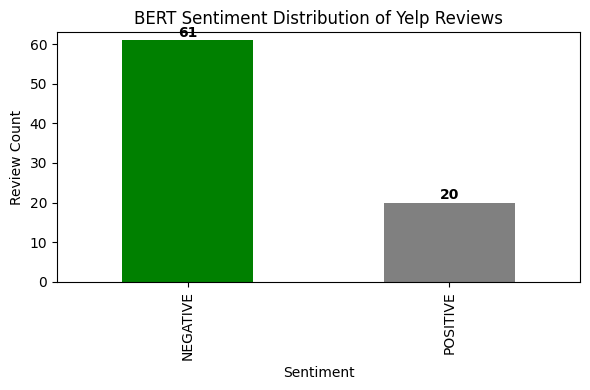

In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Plot sentiment distribution with value labels
sentiment_counts = df_reviews["bert_sentiment"].value_counts()

# Create the bar plot
plt.figure(figsize=(6, 4))
bars = sentiment_counts.plot(kind="bar", color=["green", "gray", "red"])

# Add value labels on top of each bar
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate for the label
        yval + 0.1,  # Slightly above the bar
        int(yval),  # Value to display
        ha='center',  # Center-align text
        va='bottom',  # Align from bottom of the bar
        fontsize=10,
        fontweight='bold'
    )

# Customize plot appearance
plt.title("BERT Sentiment Distribution of Yelp Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Review Count")
plt.ylim(0, sentiment_counts.max() + 2)  # Add some space on top for labels
plt.tight_layout()
plt.show()


### **7. Aspect-Based Sentiment Analysis**

**Explanation**:
- This step identifies specific aspects (e.g., food, service) and their associated sentiments.
- RoBERTa provides a fine-grained sentiment analysis for each aspect.


In [7]:
# Import necessary libraries
import os
from collections import defaultdict
from transformers import pipeline
import spacy

# Load the CSV file (replace 'file_path.csv' with the actual file path)
file_path = "/Users/piyush/workspace/projects/BigData/final_project/aspect_dictionary.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Create the aspect_keywords dictionary
aspect_keywords = {}

# Iterate through the DataFrame to populate the dictionary
for index, row in df.iterrows():
    category = str(row['Category']).strip().lower()  # Convert category to lowercase for consistency
    if pd.notnull(row['Merged']):  # Check if the cell is not NaN
        keywords = [word.strip() for word in str(row['Merged']).split(",")]
        aspect_keywords[category] = keywords

# Suppress parallelism warnings
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Load SpaCy NLP model
nlp = spacy.load("en_core_web_sm")

# Load RoBERTa Sentiment Model
sentiment_analyzer = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# Label mapping for RoBERTa model
label_map = {
    "LABEL_0": "Negative",
    "LABEL_1": "Neutral",
    "LABEL_2": "Positive"
}

# Function to analyze review text for aspects and sentiment
def analyze_review(text):
    doc = nlp(text.lower())  # Tokenize review
    aspects = {aspect: [] for aspect in aspect_keywords}  # Store matched words

    # Extract aspects from text (removing stopwords)
    for token in doc:
        if token.is_stop or token.is_punct:
            continue  # Skip common stopwords and punctuations
        for aspect, keywords in aspect_keywords.items():
            if token.lemma_ in keywords:
                aspects[aspect].append(token.text)

    # Remove empty aspects
    aspects = {aspect: words for aspect, words in aspects.items() if words}

    # Initialize sentiment results
    sentiment_scores = {aspect: {"Positive": 0, "Negative": 0, "Neutral": 0, "score": 0} for aspect in aspect_keywords}

    # Analyze sentiment for each detected aspect
    for aspect, keywords in aspects.items():
        if keywords:
            sentiment_result = sentiment_analyzer(" ".join(keywords))[0]  # Sentiment Prediction
            label = label_map[sentiment_result["label"]]  # Map numeric label to sentiment
            
            # Update sentiment scores
            sentiment_scores[aspect][label] += 1
            sentiment_scores[aspect]["score"] = sentiment_result["score"]

    return {"sentiment": sentiment_scores}

df_reviews["aspect_sentiment"] = df_reviews["text"].apply(lambda x: analyze_review(x)['sentiment'])
# Save updated dataset
df_reviews.to_csv("aspect_sentiment.csv", index=False)

Device set to use mps:0


In [8]:
# Example usage
sample_review = "The pizza was delicious but overpriced. The waiter was rude, but the ambiance was nice."
result = analyze_review(sample_review)
print(result)



{'sentiment': {'ambience': {'Positive': 1, 'Negative': 0, 'Neutral': 0, 'score': 0.9000430107116699}, 'food': {'Positive': 1, 'Negative': 0, 'Neutral': 0, 'score': 0.9398431777954102}, 'general': {'Positive': 1, 'Negative': 0, 'Neutral': 0, 'score': 0.9755706191062927}, 'prices': {'Positive': 0, 'Negative': 1, 'Neutral': 0, 'score': 0.8599962592124939}, 'service': {'Positive': 0, 'Negative': 1, 'Neutral': 0, 'score': 0.603475034236908}}}


---

### **8. Visualize Aspect-Based Sentiment**

**Explanation**:
- This visualization helps businesses identify strengths and weaknesses across different aspects (e.g., food, service, ambiance).
- Each aspect's sentiment distribution is displayed in a bar chart.

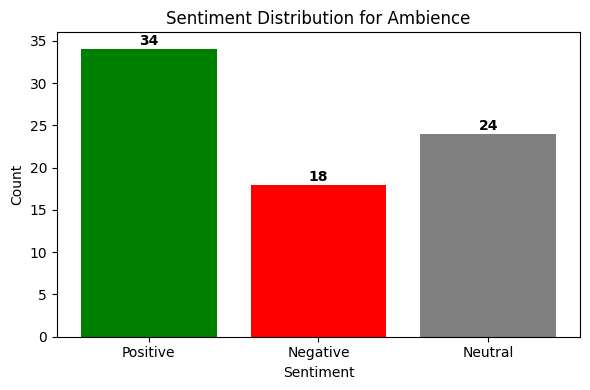

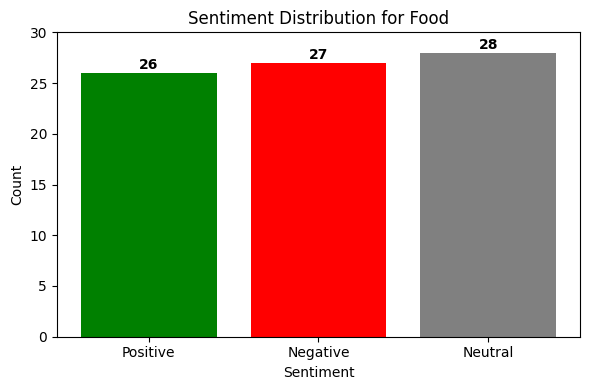

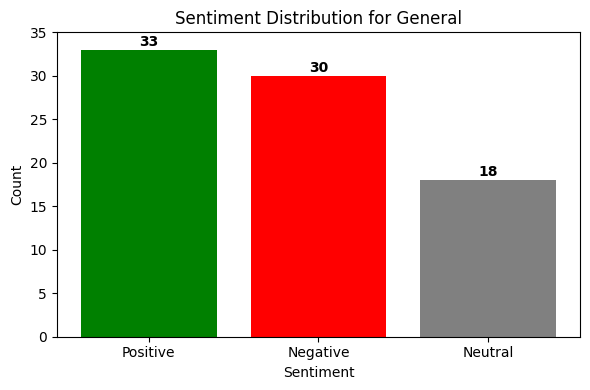

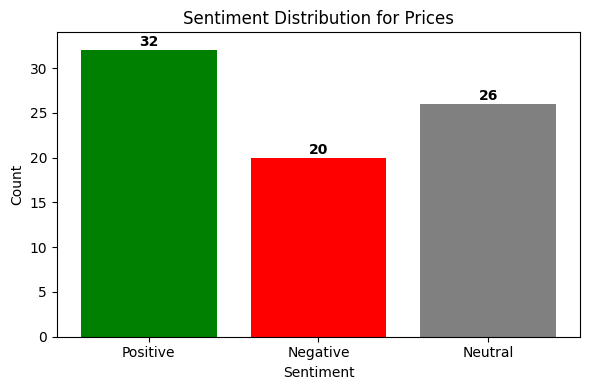

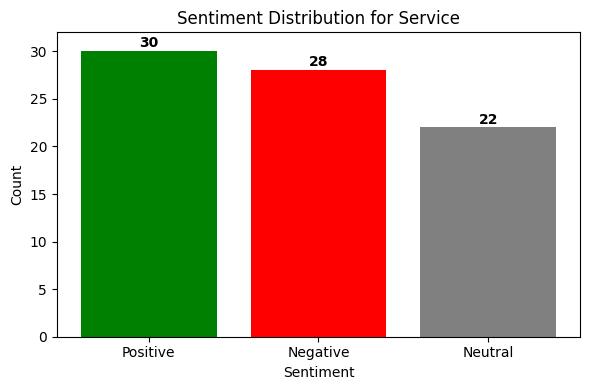

In [9]:
# Count aspect sentiment occurrences
aspect_counts = {aspect: {"Positive": 0, "Negative": 0, "Neutral": 0} for aspect in aspect_keywords}

# Count sentiment for each aspect
for aspect_dict in df_reviews["aspect_sentiment"]:
    for aspect, sentiment in aspect_dict.items():
        for key, value in sentiment.items():
            if key in aspect_counts[aspect].keys():
                aspect_counts[aspect][key] += value

# Plot sentiment distribution for each aspect with value labels
for aspect in aspect_counts:
    plt.figure(figsize=(6, 4))
    sentiment_labels = list(aspect_counts[aspect].keys())
    sentiment_values = list(aspect_counts[aspect].values())
    
    bars = plt.bar(sentiment_labels, sentiment_values, color=["green", "red", "gray"])

    # Add value labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, int(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Chart details
    plt.title(f"Sentiment Distribution for {aspect.capitalize()}")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.ylim(0, max(sentiment_values) + 2)  # Add space above for label visibility
    plt.tight_layout()
    plt.show()

In [10]:

# Define the aspect and sentiment to filter
aspect = "service"
sentiment = "Negative"

# Extracting reviews where the specified aspect has a non-zero sentiment score
filtered_reviews = []

for index, row in df_reviews.iterrows():
    aspect_sentiments = row["aspect_sentiment"]  # Directly accessing aspect sentiment dictionary
    
    if aspect in aspect_sentiments and aspect_sentiments[aspect][sentiment] > 0:
        confidence = aspect_sentiments[aspect][sentiment]  # Using sentiment score
        filtered_reviews.append((row["text"], confidence))

# Convert to DataFrame for sorting
filtered_df = pd.DataFrame(filtered_reviews, columns=["review", "score"])

# Sort by sentiment score in descending order
filtered_df_sorted = filtered_df.sort_values(by="score", ascending=False)

pd.set_option('display.max_colwidth', None) # Prevent truncation
# Display the top results
display(filtered_df_sorted.head(10))  # Show top 10 reviews



,review,score
0,"I really miss the tofu and spicy eggplant. I always get half chow mein and half steamed vegetables, mostly very good. But under no circumstances should you even put one of those awful carrots into your mouth. I can't imagine what they have done to the carrots, but they taste like poison. And maybe cut the broccoli just a little bit more....",1
1,How many ways can you say slow. Not just a little slow like TSA at the airport; I mean so slow you forgot what you ordered by the time they ask you to pay. Mystery meat and copious amounts of salt. In a single word BAD!,1
26,The staff here are very rude. In particular one guy named Beck who had a horrible attitude toward me and my 4 year old daughter. After I was treated poorly by the workers here I asked to talk to the manager and Beck told me there is no manager. Because of how rude the workers are I will never go to this location again. Also my friend once saw a cockroach in the chow mein here. Avoid this location.,1
25,"This is the worst Panda Express I've ever been to. Placed an order online and it said it would be ready in 30 mins, arrived and it wasn't ready. Stood there for 20 mins still wasn't ready so I went out to the car and my husband went in to wait. He asked about the order status they said they were working on it, 10 mins later he asked again then they said they did not have our order and asked if we were sure we placed it for that location. He showed proof that we did so again they said they would work on it. My husband drove my son and I home to wait there because we couldn't waste any more of our day sitting in the car. When he went back the food was ready, once we opened it up at home they skimped us big time only gave us 2 tiny shriveled spicy chicken strips on one of the orders. Total rip off and complete waste of time! I go to the location in Paseo Nuevo often and have never seen such a dirty, disorganized, and poorly managed restaurant. Avoid it like the plague there's a reason it has such bad reviews.",1
24,"Terrible service; line was out the door, very rude, not allergy accommodating. 1/5 for sure",1
23,"Rude, rude, RUDE! Hopefully management can look at this review and realize they have a SERIOUS customer service problem. Just left there (Wednesday 6/23). Someone needs to tell these employees that they are open until 9:30 and that they should happily serve their customers until 9:30. Seems like they were completely inconvenienced with us showing up at 9:00 to eat and was even rudely escorted out at exactly 9:30.",1
22,The servings for a 2-entree plate is so little that it's not even enough for my 6 year old. Service is getting worse and worse.,1
21,"I watched as the Styrofoam containers were put in plastic bags so patrons could carry their lunch from the counter to a table 8, 10, 12 feet away. 10 minutes later, after the meal, the bags were thrown in the trash. Really? Maybe switch to paper bags if you can't ask the patrons to do without. In this day and age please change your bad habits.",1
20,"Disappointing service and food. Ordered ahead with the app and when I picked up my food I had to repeat my name 5 times for her to go search before she finally found my order. Panda usually has great standards and you can go to any restaurant and have it taste the same. Not here. The only thing that tasted right was our spring rolls, all the meat we ordered tasted weird, even the orange chicken tasted strange and more like teriyaki. The chow mein was burnt and terrible. Will not be visiting this location again.",1
19,Nathan is the worst employee ive come across. Did not make me feel welcome. Made it feel very rushed and uncomfortable.,1
